# Pymaceuticals Inc.
---

### Analysis

- First observation is mice treated with Capomulin and Ramicane have an overall lower final tumor volume compared to the other drug treatments. This could mean that they are more effective in treating tumors compared to other drugs.

- Second observation is that heavier mice tend to have higher average tumor volume. It could be that tumors grow grow faster in heavier mice compared to lighter mice.

- Thirdly, I beieve we can further explore how effective the treatments are by looking initial tumor volume and final tumor volume for each mice and looking at the drug regimen used for them to see which drug is most effective.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.

mice_list = mouse_df["Mouse ID"].unique()
len(mice_list)

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create a Series with indices Mouse ID and Timepoint and the value_count for each Mouse ID and Timepoint pair
mice_list_dup = mouse_df[["Mouse ID","Timepoint"]].value_counts()

# Make the above Series into a dataframe with Mouse ID and Timepoint as columns and the values column with
# column name 0
mice_list_dup = mice_list_dup.reset_index()

# Collect the Mouse ID with duplicate values for the same Timepoint into an array
mice_list_dup = mice_list_dup[mice_list_dup[0] > 1]["Mouse ID"].unique()

mice_list_dup

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

# Create an empty DataFrame top concatenate the Mouse ID data with duplicates
mice_df_dup = pd.DataFrame()

# Loop through the duplicate mice list then concatenate its data from the main DataFrame with mice_df_dup
for mouse in mice_list_dup:
    mice_df_dup = pd.concat([mice_df_dup, mouse_df.loc[(mouse_df["Mouse ID"]) == mouse]])

mice_df_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean = mouse_df.copy()

# Delete the rows that have the duplicate mouse
for mouse in mice_list_dup:
    mouse_df_clean = mouse_df_clean.loc[~(mouse_df_clean["Mouse ID"] == mouse)]


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df_clean["Mouse ID"].unique())

248

## Summary Statistics
---

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Create a Dataframe for each of the stats we want (mean, median, variance, standard deviation, and SEM)

tumor_mean_drug = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index()
tumor_median_drug = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index()
tumor_var_drug = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index()
tumor_st_dev_drug = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index()
tumor_st_err_drug = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().reset_index()

# Rename the "Tumor Volume (mm3)"" column name of each DataFrame above into their respective stat
tumor_mean_drug = tumor_mean_drug.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_median_drug = tumor_median_drug.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
tumor_var_drug = tumor_var_drug.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
tumor_st_dev_drug = tumor_st_dev_drug.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
tumor_st_err_drug = tumor_st_err_drug.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Merge the DataFrames above and set the index as the Drug Regimen

tumor_stats = pd.merge(tumor_mean_drug, tumor_median_drug, how="left", on="Drug Regimen")
tumor_stats = pd.merge(tumor_stats, tumor_var_drug, how="left", on="Drug Regimen")
tumor_stats = pd.merge(tumor_stats, tumor_st_dev_drug, how="left", on="Drug Regimen")
tumor_stats = pd.merge(tumor_stats, tumor_st_err_drug, how="left", on="Drug Regimen")

tumor_stats = tumor_stats.set_index("Drug Regimen")

tumor_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_stats_agg = mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename Columns for better readability
tumor_stats_agg = tumor_stats_agg.rename(columns={"mean": "Mean Tumor Volume"})
tumor_stats_agg = tumor_stats_agg.rename(columns={"median": "Median Tumor Volume"})
tumor_stats_agg = tumor_stats_agg.rename(columns={"var": "Tumor Volume Variance"})
tumor_stats_agg = tumor_stats_agg.rename(columns={"std": "Tumor Volume Std. Dev."})
tumor_stats_agg = tumor_stats_agg.rename(columns={"sem": "Tumor Volume Std. Err."})

tumor_stats_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts
---

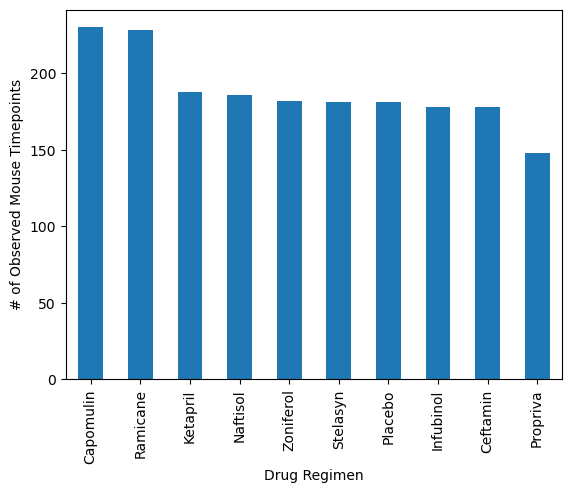

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a Series of number of mice tried for each Drug Regimen
mice_number_bar = mouse_df_clean["Drug Regimen"].value_counts()

# Create a bar chart using .plot
mice_number_bar = mice_number_bar.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")
plt.show()

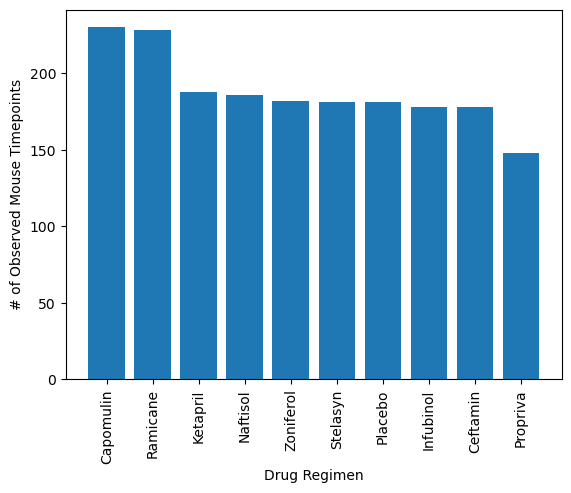

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a Series of number of mice tried for each Drug Regimen
mice_number_bar_2 = mouse_df_clean["Drug Regimen"].value_counts()

# Plot the above Series
plt.bar(mice_number_bar_2.index, mice_number_bar_2)

# Set the labels for the x and y axis
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


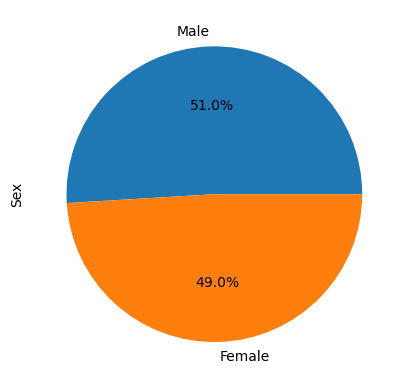

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a Series that lists the number of male and female mice
mice_gender = mouse_df_clean["Sex"].value_counts()

# Plot the pie chart
mice_gender_pie = mice_gender.plot(kind="pie", autopct="%1.1f%%")

plt.show()

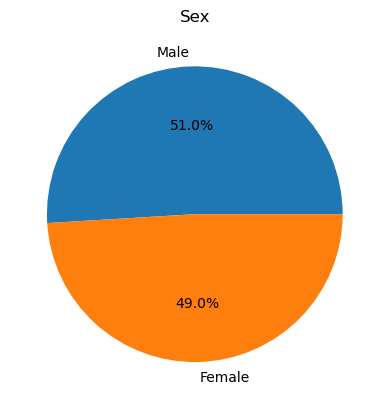

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Using the Series mice_gender, do the same pie chart as above
plt.pie(mice_gender, autopct="%1.1f%%", labels=mice_gender.index)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots
---

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = mouse_df_clean.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(final_tumor_df, mouse_df_clean)
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# drug_list = mouse_df_clean["Drug Regimen"].unique()  # Test if code works for all of the drugs

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Define a dictionary to store the variables
drug_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_loop = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug , :]
    
    # add subset 
    drug_dict[drug] = tumor_loop["Tumor Volume (mm3)"].values
    
    # Determine outliers using upper and lower bounds

    # Define the quartiles, IQR, upper bound and lower bound for the current drug
    quartiles = tumor_loop["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Identify the outliers in the current drug's tumor values
    outliers = tumor_loop.loc[(tumor_loop["Tumor Volume (mm3)"] > upper_bound) | (tumor_loop["Tumor Volume (mm3)"] < lower_bound), :]["Tumor Volume (mm3)"].values
    
    # Print appropriate results for the outliers

    # No outliers
    if len(outliers) == 0:
        print(f"{drug}'s potential outliers: None")

    # List out all the outliers if they exist
    else:   
        for i in outliers:
            outlier_str = str(i) + ", "
        print(f"{drug}'s potential outliers: " + outlier_str[0: len(outlier_str) - 2] )


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


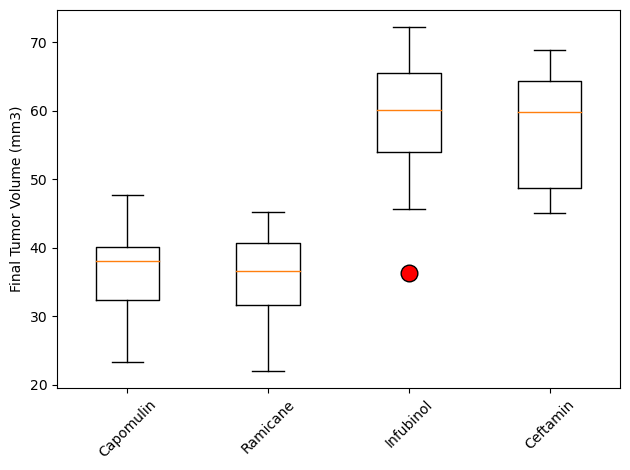

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Empty dictionary to store final tumor values for each drug. Drug Regimen as keys and final tumor as values
drug_dict = {}
for drug in drug_list:
    drug_dict[drug] = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, :]["Tumor Volume (mm3)"].values
    
# Create a boxplot for each of the drug and their values
fig1, ax1 = plt.subplots()

# flierprops to highlight the outier
ax1.boxplot(drug_dict.values(), flierprops = dict(marker = "o", markerfacecolor = "red", markersize=12))
ax1.set_xticklabels(drug_dict.keys())
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Line and Scatter Plots
---

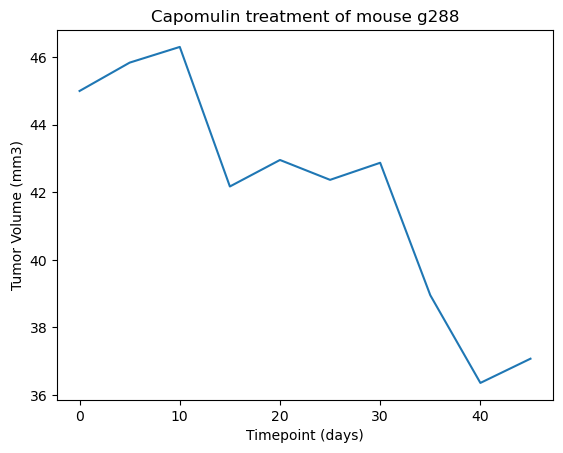

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# I would like to find the data for a random mouse treated wit Capomulin

# Find a random mouse treated with Capomulin
# Import random module
import random

# Dataframe of all mice treated with Capomulin
mice_capomulin = mouse_df_clean.loc[mouse_df_clean["Drug Regimen"] == "Capomulin", :]

# Make a list of all mice treated with Capomulin
mice_list_cap = mice_capomulin["Mouse ID"].unique()

# Generate a random number between mice treated with Capomulin
rand_num = random.randint(0, len(mice_list_cap)-1)

# Collect the random mouse's info into a dataframe
mouse_info = mouse_df_clean.loc[mouse_df_clean["Mouse ID"] == mice_list_cap[rand_num], :]

# Plot a line graph for mice with more than one timepoint data
if len(mouse_info["Timepoint"].values) > 1:
    plt.plot(mouse_info["Timepoint"].values, mouse_info["Tumor Volume (mm3)"].values)
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(f"Capomulin treatment of mouse {mice_list_cap[rand_num]}")

# Plot a scatter plot for mice with only a single timepoint data
else:
    plt.scatter(mouse_info["Timepoint"].values, mouse_info["Tumor Volume (mm3)"].values)
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(f"Capomulin treatment of mouse {mice_list_cap[rand_num]}")

plt.show()

#### Extra: Plot Tumor Volume vs Time Point for a random mouse
---

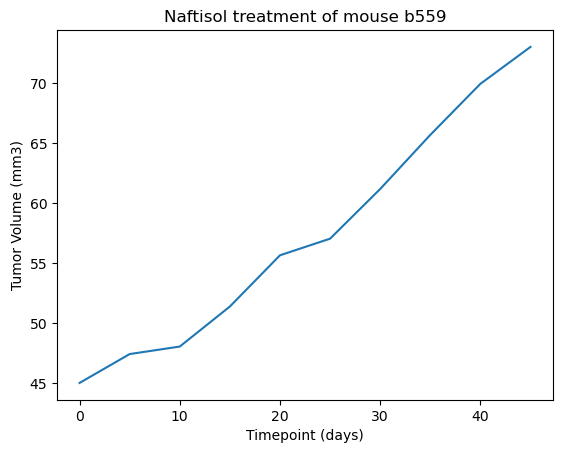

In [120]:
#################################################################################
#########################  This is an experiment  ###############################
#################################################################################

# Experiment with plotting tumor volume vs. time point for a random mouse

# Need to remove the duplicate mice from the total mice list
mice_list_clean = np.setdiff1d(mice_list, [mice_list_dup[0]])

# Generate a random number between all the mice
rand_num = random.randint(0, len(mice_list_clean)-1)

# Collect the random mouse's info into a dataframe
mouse_info = mouse_df_clean.loc[mouse_df_clean["Mouse ID"] == mice_list_clean[rand_num], :]

# Collect the drug regimen used for this specific mouse
mouse_drug = mouse_info["Drug Regimen"].values[0]

# Plot a line graph for mice with more than one timepoint data
if len(mouse_info["Timepoint"].values) > 1:
    plt.plot(mouse_info["Timepoint"].values, mouse_info["Tumor Volume (mm3)"].values)
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(f"{mouse_drug} treatment of mouse {mice_list_clean[rand_num]}")

# Plot a scatter plot for mice with only a single timepoint data
else:
    plt.scatter(mouse_info["Timepoint"].values, mouse_info["Tumor Volume (mm3)"].values)
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(f"{mouse_drug} treatment of mouse {mice_list_clean[rand_num]}")

plt.show()

---

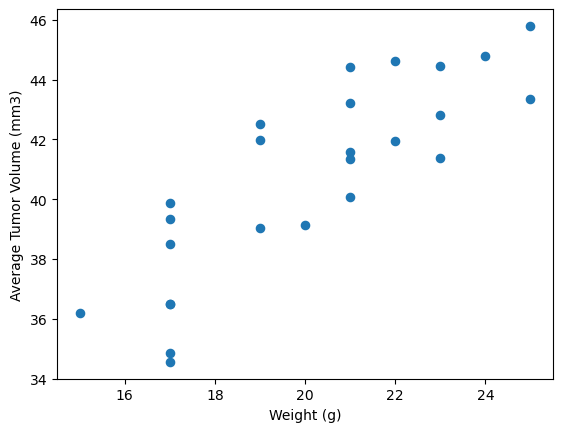

In [121]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Empty list to store dictionaries to make into a DataFrame later
cap_weight_tumor = []

# Loop through all the mice treated with Capomulin
for mouse in mice_list_cap:

    # Dataframe to store data  for the current mouse
    mouse_w_t_df = mice_capomulin.loc[mice_capomulin["Mouse ID"] == mouse]

    # Calculate the mean tumor volume for all timepoints
    average_tumor = mouse_w_t_df["Tumor Volume (mm3)"].mean()

    # Create the dictionary with weight and average tumor values for the current mouse
    cap_weight_tumor.append({'Weight (g)': mouse_w_t_df["Weight (g)"].values[0],
                             "Average Tumor Volume (mm3)": average_tumor})

# Dataframe created with weights and average tumor values of each mouse
cap_weight_tumor = pd.DataFrame(cap_weight_tumor)

# Plot the values weight vs. average tumor values
cap_weight_tumor.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)', s=35)

plt.show()



## Correlation and Regression
---

The correlation between mouse weight and average tumor volume is 0.84


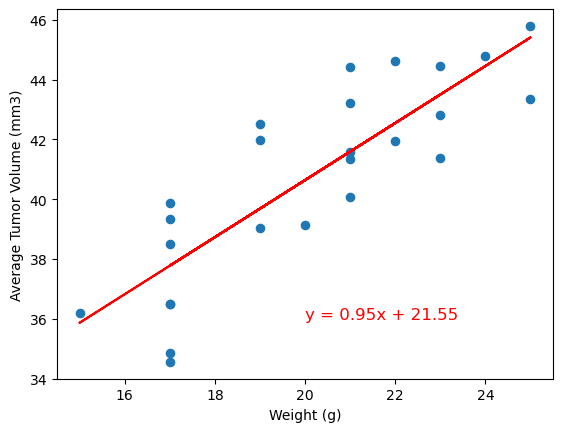

In [122]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Define values we need to find regression line
weight = cap_weight_tumor["Weight (g)"].values
tumor_vol = cap_weight_tumor["Average Tumor Volume (mm3)"].values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_vol)
regress_values = weight*slope +  intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print out correlation
print(f"The correlation between mouse weight and average tumor volume is {round(st.pearsonr(weight, tumor_vol)[0], 2)}")

# Plot the sccatter plot and regression line
cap_weight_tumor.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)', s=35)
plt.plot(weight,regress_values, 'r')
plt.annotate(line_eq,(20,36),fontsize=12, color='red')
plt.show()